<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/DAY7_Multi_layer_Perceptron_with_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY7_Multi-layer Perceptron with Dropout

Description:
-  build a multi-layer perceptron (MLP) with dropout regularization to prevent overfitting.
- introduced multiple hidden layers and dropout layers to improve generalization.

Goal:
Classify FashionMNIST images using an MLP with dropout applied between layers.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load FashionMNIST and apply transforms
transform = transforms.ToTensor()
train_ds = datasets.FashionMNIST(root='./data', train=True, transform=transform,
                                 download=True)
test_ds = datasets.FashionMNIST(root='./data', train=False, transform=transform,
                                download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 331kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.53MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.61MB/s]


In [8]:
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=1000)

In [9]:
# Define a multi-layer perceptron with dropout layers
class MLPDropout(nn.Module):
    def __init__(self):
        super(MLPDropout, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # First hidden layer
        self.drop1 = nn.Dropout(0.5)      # Dropout after first layer
        self.fc2 = nn.Linear(256, 128)    # Second hidden layer
        self.drop2 = nn.Dropout(0.5)      # Dropout after second layer
        self.out = nn.Linear(128, 10)     # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)           # Flatten image
        x = F.relu(self.fc1(x))         # Apply ReLU
        x = self.drop1(x)               # Apply dropout
        x = F.relu(self.fc2(x))         # Apply ReLU
        x = self.drop2(x)               # Apply dropout
        return self.out(x)              # Output logits

model = MLPDropout()
# Use cross-entropy loss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
for epoch in range(21):
    model.train()
    running_loss = 0.0
    pbar = tqdm(train_dl, desc=f'Epoch {epoch+1}')
    for images, labels in pbar:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        pbar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1}, Avg Loss: {running_loss / len(train_dl):.4f}")

Epoch 1: 100%|██████████| 938/938 [00:16<00:00, 55.40it/s, loss=0.241]


Epoch 1, Avg Loss: 0.5305


Epoch 2: 100%|██████████| 938/938 [00:17<00:00, 53.72it/s, loss=0.682]


Epoch 2, Avg Loss: 0.4663


Epoch 3: 100%|██████████| 938/938 [00:17<00:00, 52.84it/s, loss=0.53]


Epoch 3, Avg Loss: 0.4407


Epoch 4: 100%|██████████| 938/938 [00:25<00:00, 36.11it/s, loss=0.596]


Epoch 4, Avg Loss: 0.4199


Epoch 5: 100%|██████████| 938/938 [00:17<00:00, 53.07it/s, loss=0.645]


Epoch 5, Avg Loss: 0.4077


Epoch 6: 100%|██████████| 938/938 [00:17<00:00, 52.88it/s, loss=0.485]


Epoch 6, Avg Loss: 0.4003


Epoch 7: 100%|██████████| 938/938 [00:20<00:00, 44.78it/s, loss=0.436]


Epoch 7, Avg Loss: 0.3891


Epoch 8: 100%|██████████| 938/938 [00:17<00:00, 53.49it/s, loss=0.325]


Epoch 8, Avg Loss: 0.3788


Epoch 9: 100%|██████████| 938/938 [00:19<00:00, 47.89it/s, loss=0.259]


Epoch 9, Avg Loss: 0.3746


Epoch 10: 100%|██████████| 938/938 [00:19<00:00, 48.88it/s, loss=0.151]


Epoch 10, Avg Loss: 0.3668


Epoch 11: 100%|██████████| 938/938 [00:18<00:00, 51.23it/s, loss=0.436]


Epoch 11, Avg Loss: 0.3663


Epoch 12: 100%|██████████| 938/938 [00:18<00:00, 51.80it/s, loss=0.334]


Epoch 12, Avg Loss: 0.3582


Epoch 13: 100%|██████████| 938/938 [00:20<00:00, 46.39it/s, loss=0.493]


Epoch 13, Avg Loss: 0.3522


Epoch 14: 100%|██████████| 938/938 [00:18<00:00, 51.12it/s, loss=0.315]


Epoch 14, Avg Loss: 0.3511


Epoch 15: 100%|██████████| 938/938 [00:17<00:00, 53.16it/s, loss=0.613]


Epoch 15, Avg Loss: 0.3448


Epoch 16: 100%|██████████| 938/938 [00:18<00:00, 49.87it/s, loss=0.248]


Epoch 16, Avg Loss: 0.3435


Epoch 17: 100%|██████████| 938/938 [00:18<00:00, 51.94it/s, loss=0.215]


Epoch 17, Avg Loss: 0.3430


Epoch 18: 100%|██████████| 938/938 [00:18<00:00, 51.97it/s, loss=0.351]


Epoch 18, Avg Loss: 0.3363


Epoch 19: 100%|██████████| 938/938 [00:18<00:00, 50.79it/s, loss=0.317]


Epoch 19, Avg Loss: 0.3370


Epoch 20: 100%|██████████| 938/938 [00:17<00:00, 52.15it/s, loss=0.313]


Epoch 20, Avg Loss: 0.3332


Epoch 21: 100%|██████████| 938/938 [00:18<00:00, 50.56it/s, loss=0.409]

Epoch 21, Avg Loss: 0.3315



✅ Test Accuracy: 88.23%


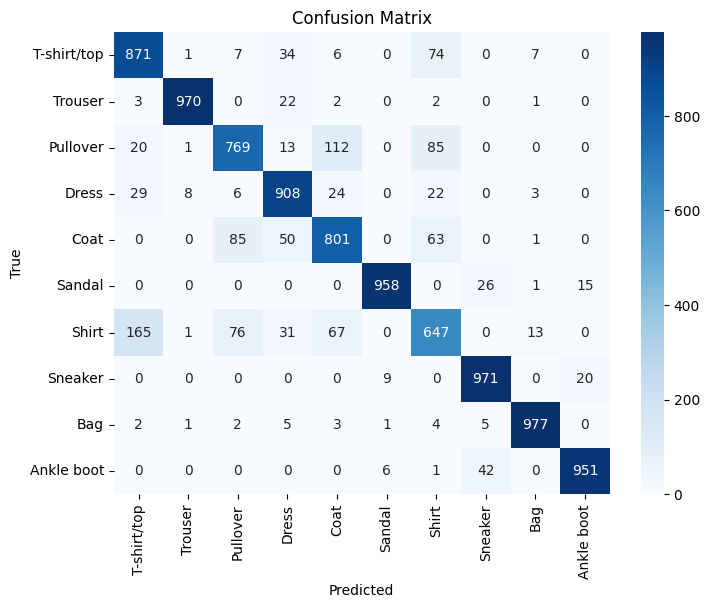


📊 Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.77      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.79      0.80      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.65      0.68      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [15]:
# Evaluation on test set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Accuracy
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_ds.classes,
            yticklabels=train_ds.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_ds.classes))

In [16]:
# barchmark this with my localWX